# Assets with Risky Returns: Portfolio Choice

In [1]:
from time import time

from HARK.ConsumptionSaving.ConsIndShockModel import (
    IndShockConsumerType,
    IndShockConsumerType_constructors_default,
)
from HARK.ConsumptionSaving.ConsPortfolioModel import (
    PortfolioConsumerType,
    init_portfolio,
)
from HARK.ConsumptionSaving.ConsRiskyAssetModel import (
    RiskyAssetConsumerType,
    IndShockRiskyAssetConsumerType_constructor_default,
)
from HARK.utilities import plot_funcs, plot_funcs_der
import matplotlib.pyplot as plt

In [2]:
mystr = lambda number: f"{number:.4f}"

## Idiosyncratic Income Shocks Consumer Type

In [3]:
# Make a dictionary for the idiosyncratic shocks type that uses common values from the portfolio type
common_dict = init_portfolio.copy()
common_dict["constructors"] = IndShockConsumerType_constructors_default
common_dict["CRRA"] = 5.0  # but make them pretty risk averse

In [4]:
# Make and solve an example consumer with idiosyncratic income shocks
# Use init_portfolio parameters to compare to results of PortfolioConsumerType
IndShockExample = IndShockConsumerType(**common_dict)
IndShockExample.cycles = 0  # Make this type have an infinite horizon

In [5]:
start_time = time()
IndShockExample.solve()
end_time = time()
print(
    "Solving a consumer with idiosyncratic shocks took "
    + mystr(end_time - start_time)
    + " seconds.",
)
IndShockExample.unpack("cFunc")

Solving a consumer with idiosyncratic shocks took 0.4279 seconds.


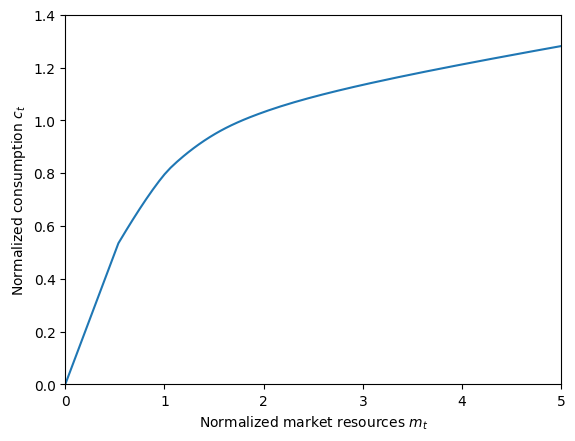

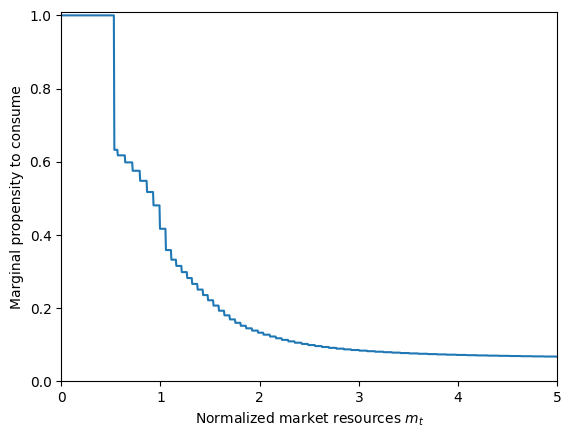

In [6]:
# Plot the consumption function and MPC for the infinite horizon consumer
plt.xlabel(r"Normalized market resources $m_t$")
plt.ylabel(r"Normalized consumption $c_t$")
plt.ylim(0.0, 1.4)
plot_funcs(IndShockExample.cFunc[0], 0.0, 5.0)
plt.xlabel(r"Normalized market resources $m_t$")
plt.ylabel(r"Marginal propensity to consume")
plt.ylim(0.0, 1.01)
plot_funcs_der(IndShockExample.cFunc[0], 0.0, 5.0)

## Risky Return Consumer Type

In [7]:
# Make and solve an example consumer with risky returns to savings
# Use init_portfolio parameters to compare to results of PortfolioConsumerType
temp_dict = common_dict.copy()
temp_dict["constructors"] = IndShockRiskyAssetConsumerType_constructor_default
RiskyReturnExample = RiskyAssetConsumerType(**temp_dict)
RiskyReturnExample.cycles = 0  # Make this type have an infinite horizon

In [8]:
start_time = time()
RiskyReturnExample.solve()
end_time = time()
print(
    "Solving a consumer with risky returns took "
    + mystr(end_time - start_time)
    + " seconds.",
)
RiskyReturnExample.unpack("cFunc")

Solving a consumer with risky returns took 3.4879 seconds.


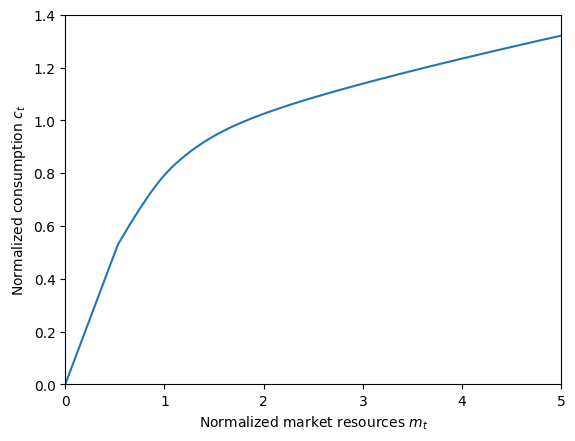

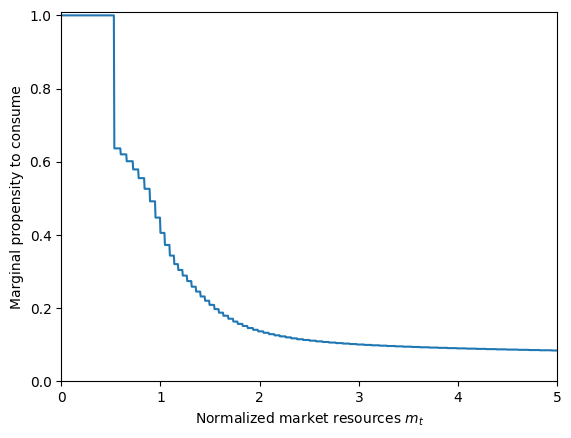

In [9]:
# Plot the consumption function and MPC for the risky asset consumer
plt.xlabel(r"Normalized market resources $m_t$")
plt.ylabel(r"Normalized consumption $c_t$")
plt.ylim(0.0, 1.4)
plot_funcs(RiskyReturnExample.cFunc[0], 0.0, 5.0)
plt.xlabel(r"Normalized market resources $m_t$")
plt.ylabel(r"Marginal propensity to consume")
plt.ylim(0.0, 1.01)
plot_funcs_der(RiskyReturnExample.cFunc[0], 0.0, 5.0)

## Compare Idiosyncratic Income Shocks with Risky Return

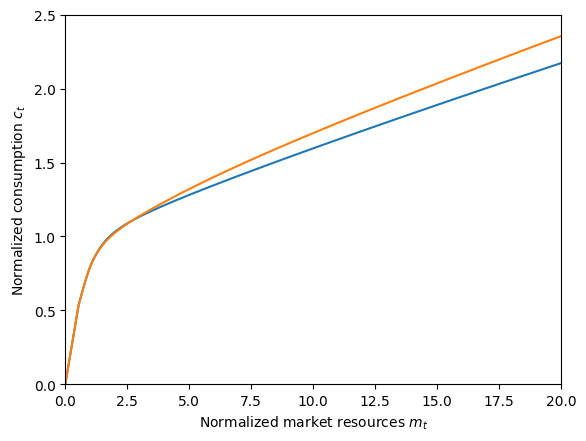

In [10]:
# Compare the consumption functions for the various agents in this notebook.
plt.xlabel(r"Normalized market resources $m_t$")
plt.ylabel(r"Normalized consumption $c_t$")
plt.ylim(0.0, 2.5)
plot_funcs(
    [
        IndShockExample.cFunc[0],  # blue
        RiskyReturnExample.cFunc[0],  # orange
    ],
    0.0,
    20.0,
)

## Risky Return Consumer Type with Portfolio Choice

In [11]:
# Make and solve an example risky consumer with a portfolio choice
temp_dict["PortfolioBool"] = True
PortfolioChoiceExample = RiskyAssetConsumerType(**temp_dict)
PortfolioChoiceExample.cycles = 0  # Make this type have an infinite horizon

In [12]:
start_time = time()
PortfolioChoiceExample.solve()
end_time = time()
print(
    "Solving a consumer with risky returns and portfolio choice took "
    + mystr(end_time - start_time)
    + " seconds.",
)
PortfolioChoiceExample.unpack("cFunc")
PortfolioChoiceExample.unpack("ShareFunc")

Solving a consumer with risky returns and portfolio choice took 3.4840 seconds.


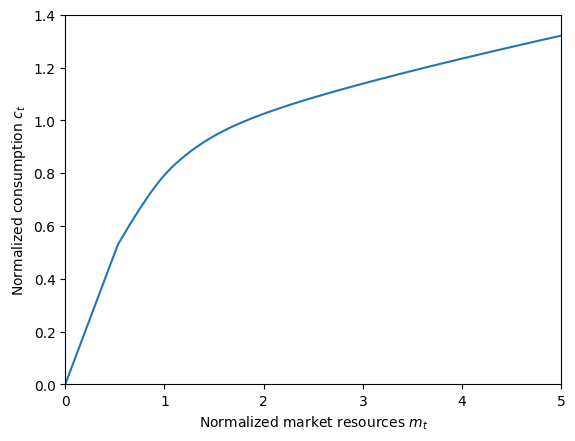

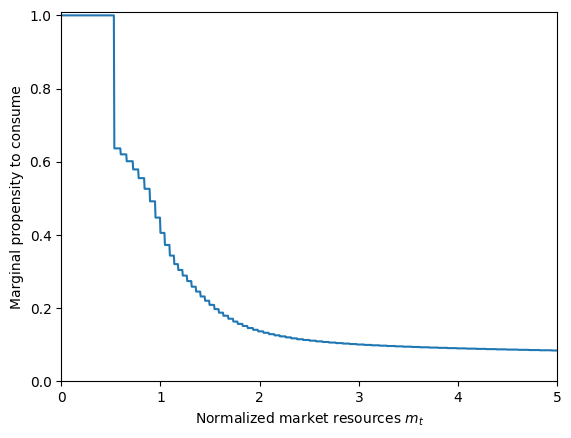

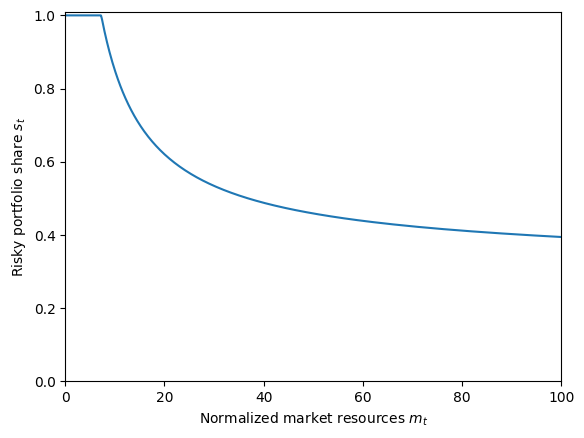

In [13]:
# Plot the consumption function and MPC for the portfolio choice consumer
plt.xlabel(r"Normalized market resources $m_t$")
plt.ylabel(r"Normalized consumption $c_t$")
plt.ylim(0.0, 1.4)
plot_funcs(PortfolioChoiceExample.cFunc, 0.0, 5.0)
plt.xlabel(r"Normalized market resources $m_t$")
plt.ylabel(r"Marginal propensity to consume")
plt.ylim(0.0, 1.01)
plot_funcs_der(PortfolioChoiceExample.cFunc, 0.0, 5.0)
plt.xlabel(r"Normalized market resources $m_t$")
plt.ylabel(r"Risky portfolio share $s_t$")
plt.ylim(0.0, 1.01)
plot_funcs(PortfolioChoiceExample.ShareFunc, 0.0, 100.0)

## Compare Income Shocks, Risky Return, and RR w/ Portfolio Choice

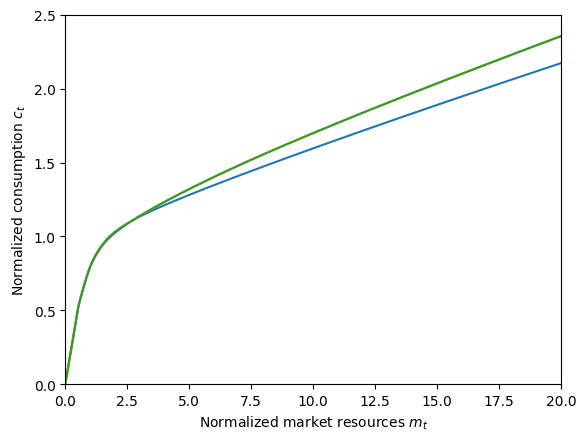

In [14]:
# Compare the consumption functions for the various agents in this notebook.
plt.xlabel(r"Normalized market resources $m_t$")
plt.ylabel(r"Normalized consumption $c_t$")
plt.ylim(0.0, 2.5)
plot_funcs(
    [
        IndShockExample.cFunc[0],  # blue
        RiskyReturnExample.cFunc[0],  # orange
        PortfolioChoiceExample.cFunc[0],  # green
    ],
    0.0,
    20.0,
)

## Portfolio Consumer Type

In [15]:
# Make and solve an example portfolio choice consumer
PortfolioTypeExample = PortfolioConsumerType(
    CRRA=5.0
)  # default parameters with higher risk aversion
PortfolioTypeExample.cycles = 0  # Make this type has an infinite horizon

In [16]:
start_time = time()
PortfolioTypeExample.solve()
end_time = time()
print(
    "Solving a consumer with portfolio choice took "
    + mystr(end_time - start_time)
    + " seconds.",
)
PortfolioTypeExample.unpack("cFuncAdj")
PortfolioTypeExample.unpack("ShareFuncAdj")

Solving a consumer with portfolio choice took 10.4373 seconds.


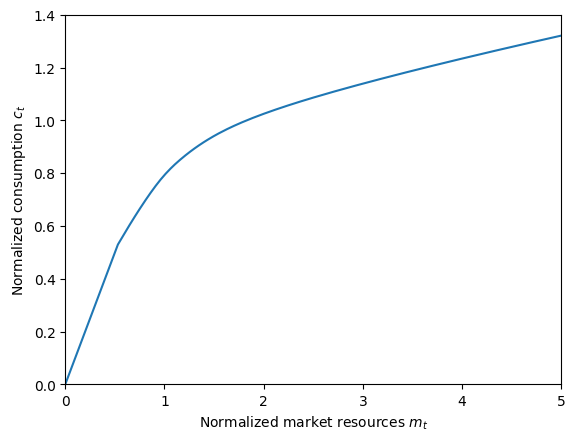

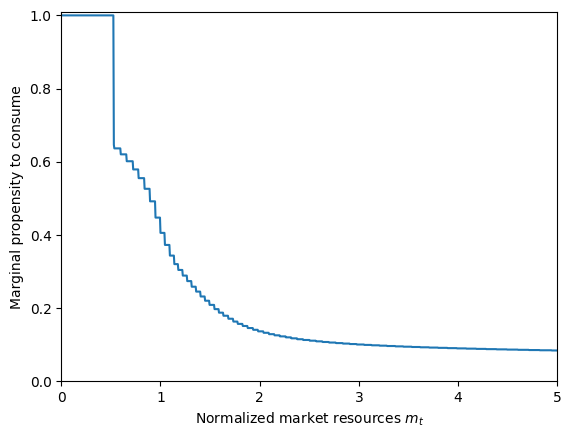

In [17]:
# Plot the consumption function and MPC for the portfolio choice consumer
plt.xlabel(r"Normalized market resources $m_t$")
plt.ylabel(r"Normalized consumption $c_t$")
plt.ylim(0.0, 1.4)
plot_funcs(PortfolioTypeExample.cFuncAdj[0], 0.0, 5.0)
plt.xlabel(r"Normalized market resources $m_t$")
plt.ylabel(r"Marginal propensity to consume")
plt.ylim(0.0, 1.01)
plot_funcs_der(PortfolioTypeExample.cFuncAdj[0], 0.0, 5.0)

## Compare RR w/ Portfolio Choice vs Portfolio Choice Type

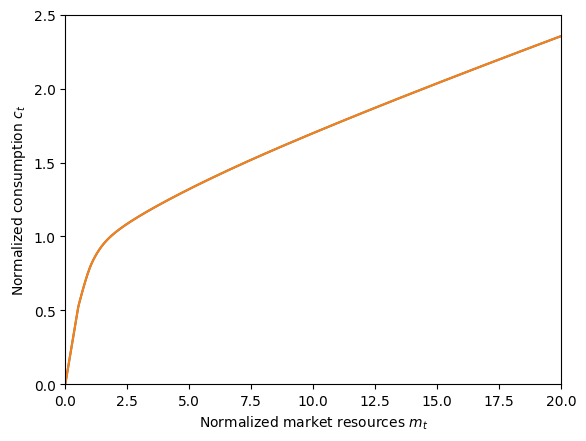

In [18]:
# Compare the consumption functions for the various portfolio choice types.
plt.xlabel(r"Normalized market resources $m_t$")
plt.ylabel(r"Normalized consumption $c_t$")
plt.ylim(0.0, 2.5)
plot_funcs(
    [
        PortfolioTypeExample.cFuncAdj[0],  # blue
        PortfolioChoiceExample.cFunc[0],  # orange
    ],
    0.0,
    20.0,
)

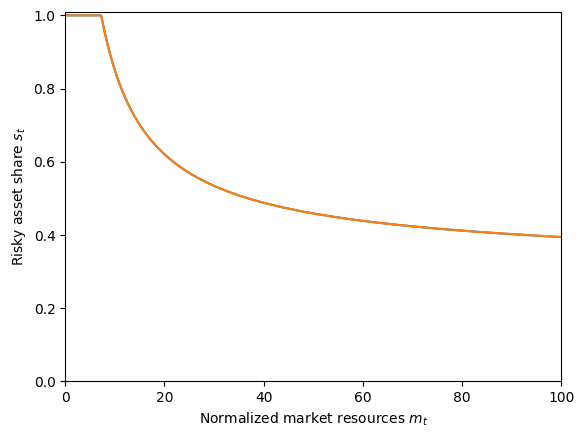

In [19]:
# Compare the share functions for the various portfolio choice types.
plt.xlabel(r"Normalized market resources $m_t$")
plt.ylabel(r"Risky asset share $s_t$")
plt.ylim(0.0, 1.01)
plot_funcs(
    [
        PortfolioTypeExample.ShareFuncAdj[0],  # blue
        PortfolioChoiceExample.ShareFunc[0],  # orange
    ],
    0,
    100,
)

## Risky Return Given Fixed Portfolio Share

In [20]:
FixedShareExample = RiskyAssetConsumerType(**temp_dict)
FixedShareExample.assign_parameters(RiskyShareFixed=0.0, PortfolioBool=False)
FixedShareExample.update()
FixedShareExample.cycles = 0

In [21]:
start_time = time()
FixedShareExample.solve()
end_time = time()
print(
    "Solving a consumer with fixed portfolio share took "
    + mystr(end_time - start_time)
    + " seconds.",
)
FixedShareExample.unpack("cFunc")

Solving a consumer with fixed portfolio share took 0.5101 seconds.


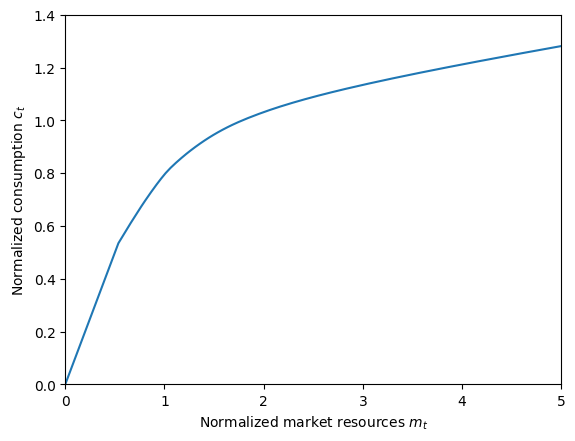

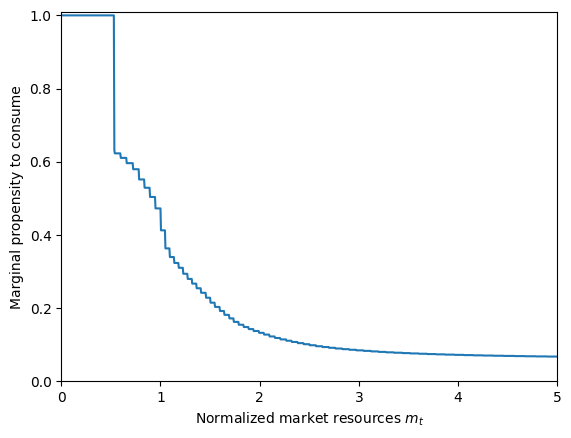

In [22]:
# Plot the consumption function and MPC for the infinite horizon consumer
plt.xlabel(r"Normalized market resources $m_t$")
plt.ylabel(r"Normalized consumption $c_t$")
plt.ylim(0.0, 1.4)
plot_funcs(FixedShareExample.cFunc[0], 0.0, 5.0)
plt.xlabel(r"Normalized market resources $m_t$")
plt.ylabel(r"Marginal propensity to consume")
plt.ylim(0.0, 1.01)
plot_funcs_der(FixedShareExample.cFunc[0], 0.0, 5.0)

## Compare Idiosyncratic Shock Type vs Fixed Share at 0.0 Type

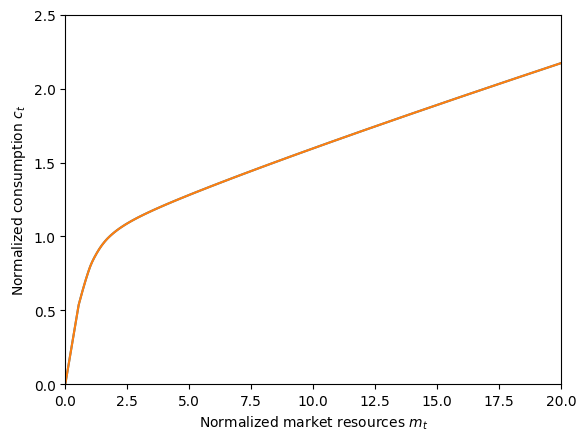

In [23]:
# Compare the consumption functions for the various idiosyncratic shocks
plt.xlabel(r"Normalized market resources $m_t$")
plt.ylabel(r"Normalized consumption $c_t$")
plt.ylim(0.0, 2.5)
plot_funcs(
    [
        IndShockExample.cFunc[0],  # blue
        FixedShareExample.cFunc[0],  # orange
    ],
    0.0,
    20.0,
)